In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

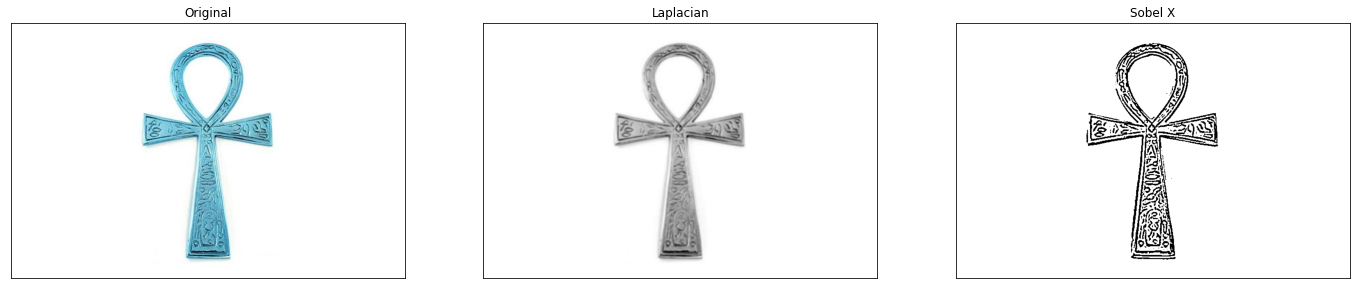

In [15]:
im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5), np.uint8)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [59]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 3, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, -1, (255,0,0), 3)

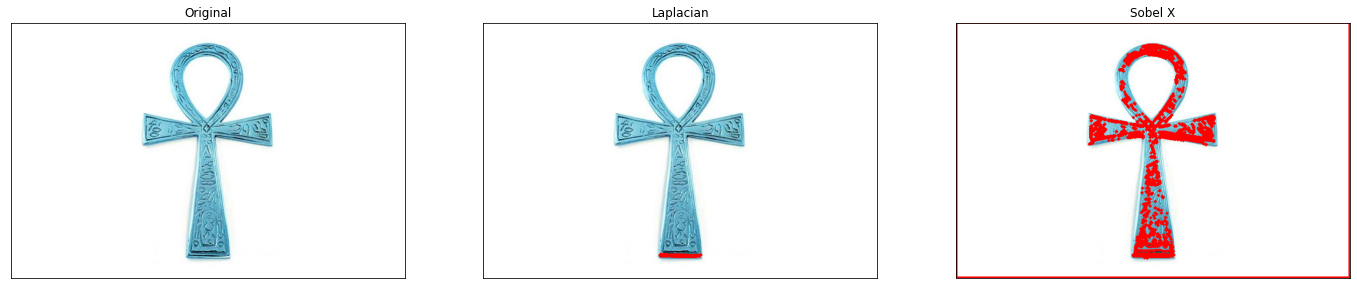

In [60]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [75]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))


{'m00': 2.0, 'm10': 736.0, 'm01': 920.0, 'm20': 270848.3333333333, 'm11': 338560.0, 'm02': 423200.3333333333, 'm30': 99672432.0, 'm21': 124590233.33333333, 'm12': 155737722.66666666, 'm03': 194672460.0, 'mu20': 0.3333333333139308, 'mu11': 0.0, 'mu02': 0.3333333333139308, 'mu30': 1.4901161193847656e-08, 'mu21': 3.958120942115784e-09, 'mu12': -2.7939677238464355e-09, 'mu03': 2.9802322387695312e-08, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 2.634178031930877e-09, 'nu21': 6.997035397316393e-10, 'nu12': -4.939083809870395e-10, 'nu03': 5.268356063861754e-09}


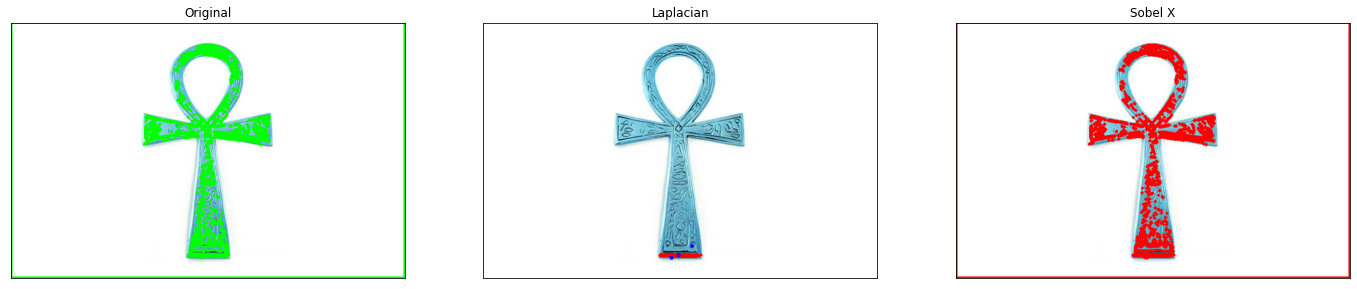

In [89]:
img = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
img = cv2.drawContours(img, contours, 3, (0,255,0), 3)

cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [88]:
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)
x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.minAreaRect(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)